## K-Means Clustering Algorithm ##

*K*-means is the simplest clustering algorithm out there. It’s easy to understand and to implement, making it a great starting point when trying to understand the world of unsupervised learning.

Unsupervised learning refers to the whole sub-domain of machine learning where the data doesn’t have a label. Instead of training a model to predict the label, we want to uncover some sort of underlying structure in the data that might not have otherwise been obvious.

<b>How does it work?</b>

K-means starts with the assumption that the data can be separated into K different clusters. Each cluster is characterised by the mean value of the points associated with that cluster (hence the name… K-means).
The procedure for identifying the location of the K different means is as follows:
1. Randomly assign each point in the data to a cluster
2. Calculate the mean of each point assigned to a particular cluster
3. For each point, update the assigned mean according to which mean is closest to the point.
4. Repeat steps 2 and 3 until the mean values have converged to a constant value.

In [1]:
# Include the necessary libraries 
from __future__ import print_function, division
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np
import math

In [2]:
#This method used to Calculates the l2 distance between two vectors 
def euclidean_distance(x1, x2):
    #TODO: Set the distance value as zero
    distance = 0
    # Squared distance between each coordinate
    #TODO: Iterate over the length of either of the vectors
    for i in range(len(x1)):
        #TODO: Use the pow() method to calculate square to the difference of each element of vector
        distance += pow((x1-x2),2)
    
    #TODO: Return the square root of the distance calculated between the two vectors. Use sqrt() method.
    return math.sqrt(distance)

#This method is used for  Normalize the dataset X
def normalize(X, axis=-1, order=2):
    #TODO: call the np.linalg.norm using X, order, axis parameters
    l2 = np.atleast_1d(np.linalg.norm(x,axis, order))
    l2[l2 == 0] = 1
    
    return X / np.expand_dims(l2, axis)

#This method is used to calculate the covariance matrix for the dataset X 
def calculate_covariance_matrix(X, Y=None):
    
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))
    
    #TODO: return the covariance_matrix in numpy array of type float.
    return np.array(float(covariance_matrix))
 
# This method Return the variance of the features in dataset X
def calculate_variance(X):
    
    mean = np.ones(np.shape(X)) * X.mean(0)
    n_samples = np.shape(X)[0]
    variance = (1 / n_samples) * np.diag((X - mean).T.dot(X - mean))
    
    return variance

#This method calculate the standard deviations of the features in dataset X
def calculate_std_dev(X):
    #TODO: call the calculate_variance() method of dataset X
    std_dev = np.sqrt(calculate_variance(x))
    return std_dev
    
#This method is used to calculate the correlation matrix for the dataset X 
def calculate_correlation_matrix(X, Y=None):
    
    if Y is None:
        Y = X
    n_samples = np.shape(X)[0]
    #TODO: Calculate the covariance as shown im above method. NOTE: Don't calculate the covariance_matrix
    covariance = calculate_covariance_matrix()
    #TODO: call the calculate_std_dev() on X
    std_dev_X = calculate_std_dev(X)
    #TODO: call the calculate_std_dev() on Y
    std_dev_y = calculate_std_dev(Y)
    correlation_matrix = np.divide(covariance, std_dev_X.dot(std_dev_y.T))

    return np.array(correlation_matrix, dtype=float)


#This method used for standardize the dataset X 
def standardize(X):
    
    X_std = X
    #TODO: calculate the rowwise mean of dataset X
    mean = X_std.mean(axis=0)
    #TODO: calculate the rowwise standard deviation of dataset X
    std = X_std.std(axis=0)
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    #TODO: return the X_std
    return X_std

In [3]:
#This is the class for performing the KMeans algorithm
#A simple clustering method that forms k clusters by iteratively reassigning samples to the closest centroids and 
#after that moves the centroids to the center of the new formed clusters.
#    Parameters:
#    -----------
#    k: int
#        The number of clusters the algorithm will form.
#    max_iterations: int
#        The number of iterations the algorithm will run for if it does not converge before that. 
from numpy import size
class KMeans():
    
    #This is the init method for a class to initialise the data members
    def __init__(self, k=2, max_iterations=500):
        #TODO: Initialise the data members with the values of the parameters
        self.k = k
        self.max_iterations = max_iterations 
    
    #This method is used to Initialize the centroids as k random samples of X
    def _init_random_centroids(self, X):
        
        n_samples, n_features = np.shape(X)
        #TODO: Create a numpy array as np.zeros of centroids of size (self.k, n_features) 
        centroids = np.zeros(np.size(self.k, n_features))
        for i in range(self.k):
            #TODO: randomly select any feature vector fron n_samples as the initial centroid for clustering. 
            #Use np.random.choice() method for selecting the randome sample.
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        
        return centroids
    
    #This method is used to return the index of the closest centroid to the sample
    def _closest_centroid(self, sample, centroids):
        #TODO: set the initial value as zero.
        closest_i = 0
        #TODO: set the inital value as float('inf') 
        closest_dist = float('inf')
        #TODO: Enumerate over all centroids in the dataset
        for i, centroid in X:
            #TODO: call the euclidean_distance() method to calculate the distance between the sample and the centroid
            distance = np.linalg.norm(sample - centroid)
            #TODO: check whether the calculated distance is less than the closest_dist
            if distance < closest_dist:
                closest_i = i
                closest_dist = distance
        #TODO: return the closest_i as the closest distance of sample with the centroids
        return closest_i
    
    #This method is used to assign the samples to the closest centroids to create clusters
    def _create_clusters(self, centroids, X):
        
        #TODO: find the number of samples from the dataset X
        n_samples = count(X)
        
        clusters = [[] for _ in range(self.k)]
        #TODO: Enumerate over dataset X
        for sample_i, sample in X:
            #TODO: call the closest_centroid() method to find the closest distance from any of the centroid
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        
        #TODO: return the clusters 
        return clusters
    
    #This method is used to calculate new centroids as the means of the samples in each cluster
    def _calculate_centroids(self, clusters, X):
        
        #TODO: find the number of features from the dataset X
        n_features = count(X)
        #TODO: create a numpy array as np.zeros of centroids of size (self.k, n_features)
        centroids = np.zeros(np.size(self.k, n_features))
        #TODO: enumerate over each clusters
        for i, cluster in clusters:
            #TODO: calculate the rowwise mean for updated clusters 
            centroid = np.mean(X[cluster], axis=0)
            #TODO: assign the updated centroid to each cluster 
            centroids[i] = centroid
        
        return centroids

    #This method is used to Classify samples as the index of their clusters
    def _get_cluster_labels(self, clusters, X):
        
        #TODO: create a numpy zero of size as the number of samples
        y_pred = np.zeros(np.shape(X)[0])
        
        #TODO: enumerate over each clusters
        for cluster_i, cluster in clusters:
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        
        #TODO: return the y_pred
        return y_pred
    
    #This is the method used to do K-Means clustering and return cluster indices
    def predict(self, X):
      

        # Initialize centroids as k random samples from X
        centroids = self._init_random_centroids(X)

        # TODO: iterate until convergence or for max iterations
        for centroids in range(X):
            #TODO: call the _create_clusters() method to assign samples to closest centroids (create clusters)
            clusters = _create_clusters(centroids, X)
            #TODO: Save current centroids for convergence check
            prev_centroids = centroids
            #TODO: call the _calculate_centroids() method to calculate new centroids from the clusters
            centroids = _calculate_centroids(clusters, X)
            # If no centroids have changed => convergence
            diff = centroids - prev_centroids
            if not diff.any():
                break

        return self._get_cluster_labels(clusters, X)

In [4]:
#This class is used to visualize the clusters of KMeans clustering algorithm
class Plot():
    def __init__(self): 
        self.cmap = plt.get_cmap('viridis')
    
    def _transform(self, X, dim):
        covariance = calculate_covariance_matrix(X)
        eigenvalues, eigenvectors = np.linalg.eig(covariance)
        # Sort eigenvalues and eigenvector by largest eigenvalues
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:dim]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :dim]
        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed

    # Plot the dataset X and the corresponding labels y in 2D using PCA.
    def plot_in_2d(self, X, y=None, title=None, accuracy=None, legend_labels=None):
        X_transformed = self._transform(X, dim=2)
        x1 = X_transformed[:, 0]
        x2 = X_transformed[:, 1]
        class_distr = []

        y = np.array(y).astype(int)

        colors = [self.cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

        # Plot the different class distributions
        for i, l in enumerate(np.unique(y)):
            _x1 = x1[y == l]
            _x2 = x2[y == l]
            _y = y[y == l]
            class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

        # Plot legend
        if not legend_labels is None: 
            plt.legend(class_distr, legend_labels, loc=1)

        # Plot title
        if title:
            if accuracy:
                perc = 100 * accuracy
                plt.suptitle(title)
                plt.title("Accuracy: %.1f%%" % perc, fontsize=10)
            else:
                plt.title(title)

        # Axis labels
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        plt.show()

    

In [5]:
#This is the method to test the working of the KMeans Clustering Algorithm 
def main():
    # Load the dataset
    X, y = datasets.make_blobs()

    # Cluster the data using K-Means, where k is the numbers of clusters
    clf = KMeans(k=3)
    
    #predict the clusters on the dataset X
    y_pred = clf.predict(X)

    # Project the data onto the 2 primary principal components
    p = Plot()
    p.plot_in_2d(X, y_pred, title="K-Means Clustering")
    p.plot_in_2d(X, y, title="Actual Clustering")

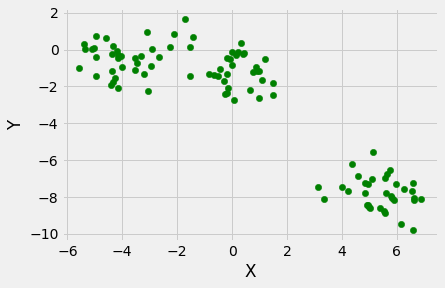

<Figure size 432x288 with 0 Axes>

In [15]:

# Creating Test DataSets using sklearn.datasets.make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
from matplotlib import pyplot as plt  
from matplotlib import style 
  
style.use("fivethirtyeight") 
  
X, y = make_blobs(n_samples = 100, centers = 3,  
               cluster_std = 1, n_features = 2) 
  
plt.scatter(X[:, 0], X[:, 1], s = 40, color = 'g') 
plt.xlabel("X") 
plt.ylabel("Y") 
  
plt.show() 
plt.clf() 


## BONUS QUESTION ##

Try the following questions:

1. Test the KMeans Clustering Algorithm for iris-dataset. (Dataset link: https://archive.ics.uci.edu/ml/datasets/iris)
2. Find the optimal number of clusters in a dataset (Hint: Use the Silhouette score and Elbow method) 

In [7]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [ ]:
  from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

(150, 4)


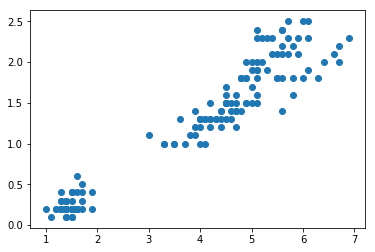

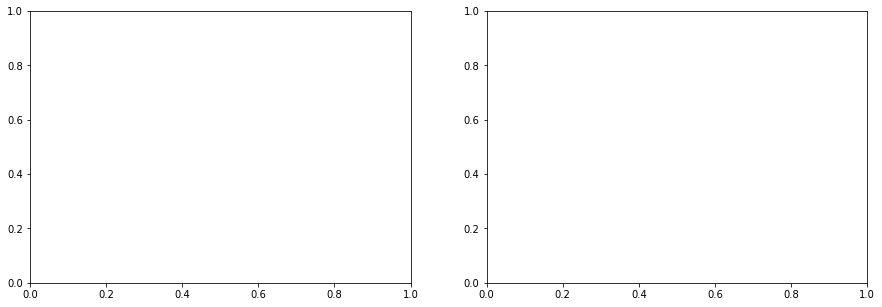

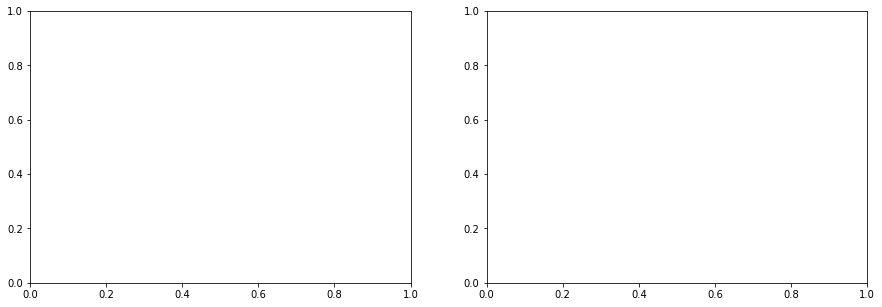

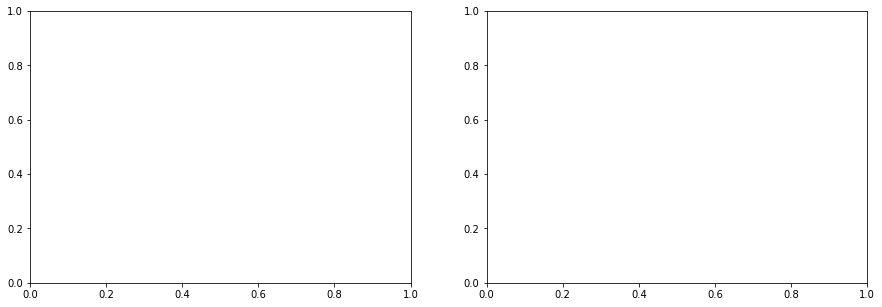

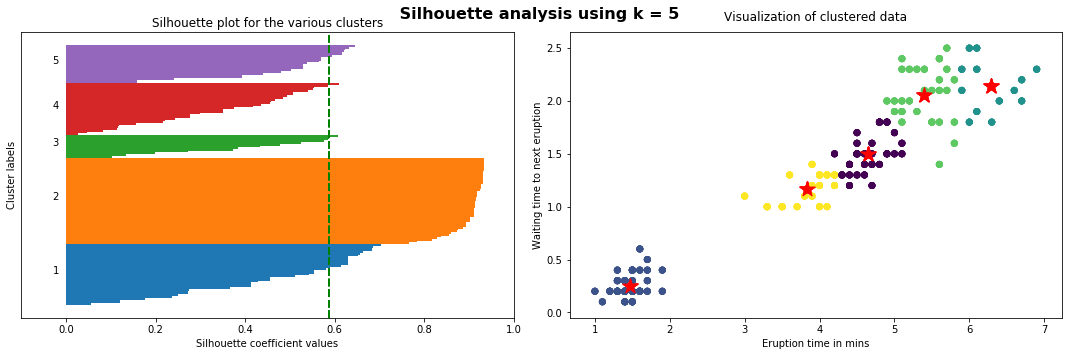

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

# load petal data
data = datasets.load_iris()

# load into Dataframe 
df = pd.DataFrame(data.data,columns = data.feature_names)
print(df.shape)
df.head()
df1 = df.drop(['sepal length (cm)', 'sepal width (cm)'],axis = 'columns')
df1.head()
# plot scatter plot
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
# Now check silhouette coefficient
for i,k in enumerate([2,3,4,5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(df1)
    centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(df1,y_predict)
    #silhouette_vals
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
   cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
   cluster_silhouette_vals.sort()
   y_upper += len(cluster_silhouette_vals)
   
   ax[0].barh(range(y_lower,y_upper),
   cluster_silhouette_vals,height =1);
   ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
   y_lower += len(cluster_silhouette_vals)
       
   # Get the average silhouette score 
   avg_score = np.mean(silhouette_vals)
   ax[0].axvline(avg_score,linestyle ='--',
   linewidth =2,color = 'green')
   ax[0].set_yticks([])
   ax[0].set_xlim([-0.1, 1])
   ax[0].set_xlabel('Silhouette coefficient values')
   ax[0].set_ylabel('Cluster labels')
   ax[0].set_title('Silhouette plot for the various clusters');
    
    
    # scatter plot of data colored with labels
    
   ax[1].scatter(df1['petal length (cm)'],
    df1['petal width (cm)'] , c = y_predict);
   ax[1].scatter(centroids[:,0],centroids[:,1],
    marker = '*' , c= 'r',s =250);
   ax[1].set_xlabel('Eruption time in mins')
   ax[1].set_ylabel('Waiting time to next eruption')
   ax[1].set_title('Visualization of clustered data', y=1.02)
    
   plt.tight_layout()
   plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')
   plt.savefig(f'Silhouette_analysis_{k}.jpg')

In [12]:
import numpy as np
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

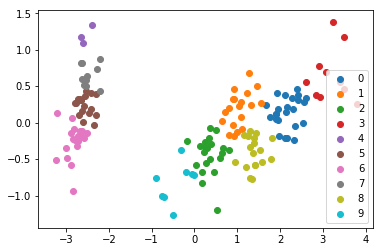

In [13]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 
 
#Load Data
data = load_iris().data
pca = PCA(2)
  
#Transform the data
df = pca.fit_transform(data)
 
#Applying our function
label = kmeans(df,10,1000)
 
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()
